# Dynamic Systems Assessements - Model Answers1: Introduction to Dynamic Systems


# Setting Up Python

In [1]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint
import plotly.graph_objects as go

import sympy as sym
from sympy import symbols
from sympy import *

from sympy.physics.mechanics import dynamicsymbols, init_vprinting

In [ ]:
class mugas_dynamic_systems_simulation_functions:
  
  def __init__(self): 
    self=[];

  def simulateDySystem(self, dynamicSystemModel, Tmax, dT, X0, sysPara, figTitle, xLabel, yLabel):
    t = np.linspace(0, Tmax, int(Tmax/dT+1))
    sol = odeint(dynamicSystemModel, X0, t, args=(sysPara,));
    self.soln=sol;
    fig = go.Figure()
    [nt,nS]=sol.shape;

    # Add traces
    for nn in range(nS):
      fig.add_trace(go.Scatter(x=t, y=sol[:,nn], mode='lines+markers', name='x'+str(nn+1)))
      fig.update_layout(title=figTitle, xaxis=dict(title=xLabel),yaxis=dict(title=yLabel))
    
    fig.show()
    return [t,sol,fig] 

  def animate_particle_motion(self, XX, axisRange, figTitle):
    xx=[jj[0] for jj in XX]
    yy=[jj[1] for jj in XX]
    zz=[jj[2] for jj in XX]

    fig = go.Figure(
        data=[go.Scatter3d(x=[xx[0]], y=[yy[0]],z=[zz[0]],
                        mode="markers",
                        marker=dict(color="red", size=10)),
              go.Scatter3d(x=xx, y=yy,z=zz, name='Path',
                        mode="lines",
                        line=dict(color="blue", width=2))],
        layout=go.Layout(
            scene = dict(
                        xaxis=dict(range=axisRange[0], autorange=False),
                        yaxis=dict(range=axisRange[1], autorange=False),
                        zaxis=dict(range=axisRange[2], autorange=False),
                        aspectratio=dict(x=1, y=1, z=1),
            ),
            title_text=figTitle, hovermode="closest",
            updatemenus=[dict(type="buttons",
                              buttons=[dict(label="Play",
                                            method="animate",
                                            args=[None])])]),
        frames=[go.Frame(
            data=[go.Scatter3d(
                x=[p[0]],
                y=[p[1]],
                z=[p[2]],
                name='Particle',
                mode="markers",
                marker=dict(color="red", size=10))])

            for p in XX]
    )

    fig.show()
    return fig

In [ ]:
def LinearSystemModel(X, t, parameters):
  A=parameters[0]; B=parameters[1];
  u=0 #np.sin(0.1*t); #Input
  dXdt=A @ X + B*u;
  return dXdt

In [ ]:
md=mugas_dynamic_systems_simulation_functions()

# Example: Spring and a Mass

Consider the problem of a horizontal spring with one end fixed to a support and the other end fixed to an object, of mass $m$, that moves on a smooth horizontal table. 

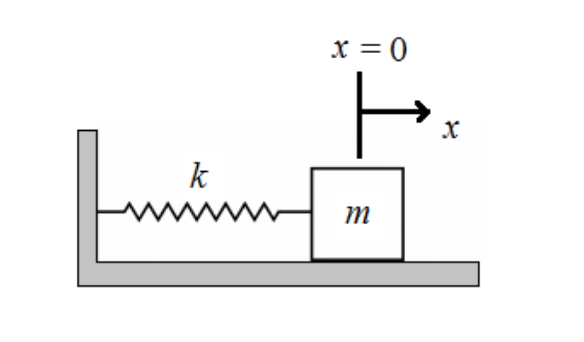


### Governing Equations

Considering the motion of the block and assuming that all surface interactions are negligible we have
\begin{align}
m\ddot{x}+kx&=0
\end{align}
where $x$ is the displacement of the object from its equilibrium rest position.

### Solution to the ODE

Let $\omega_n^2\triangleq k/m$. Then we have that the above equations can be written as $\ddot{x}+\omega_n^2 x=0$. Taking Laplace transforms of $\ddot{x}+\omega_n^2 x$ and using the linearity property of the Laplace transform operator we have
\begin{align}
\mathcal{L}\left\{\ddot{x}+\omega_n^2 x\right\}=\mathcal{L}\left\{\ddot{x}\right\}+\omega_n^2 \mathcal{L}\left\{x\right\}=\left(s^2\mathcal{L}\left\{x\right\}-sx(0)-\dot{x}(0)\right)+\omega_n^2 \mathcal{L}\left\{x\right\}.
\end{align}
Thus we have
\begin{align}
X(s)&=\frac{s}{s^2+\omega_n^2}\,x(0)+\frac{1}{s^2+\omega_n^2}\,\dot{x}(0).
\end{align}
Since the Laplace transform is a one to one taking the inverse Laplace transform we have
\begin{align}
x(t)&=\mathcal{L}^{-1}\left\{X(s)\right\}=x(0)\,\mathcal{L}^{-1}\left\{\frac{s}{s^2+\omega_n^2}\right\}+\dot{x}(0)\,\mathcal{L}^{-1}\left\{\frac{1}{s^2+\omega_n^2}\right\}\\
&=x(0)\,\cos{(\omega_n t)}+\frac{\dot{x}(0)}{\omega_n}\sin{(\omega_nt)}\sim A\,\cos{(\omega_nt+\phi)}
\end{align}

### Dynamic System Form

Let $X_1\triangleq x$ and $X_2\triangleq \dot{x}$. Then we can write the second order ODE $\ddot{x}+\omega_n^2x=0$ as the following coupled set of first order ODEs.
\begin{align}
\dot{X}_1&=X_2,\\
\dot{X}_2&=-\omega_n^2\,X_1.
\end{align}
This we can write down as the following first order matrix ODE
\begin{align}
\begin{bmatrix}
\dot{X}_1\\ \dot{X}_2
\end{bmatrix}&=
\underbrace{\begin{bmatrix}
0 & 1\\ -\omega_n^2 & 0
\end{bmatrix}}_{A}
\underbrace{\begin{bmatrix}
{X}_1\\ {X}_2
\end{bmatrix}}_{X}.
\end{align}
\begin{align}
\dot{X}=AX
\end{align}
This is typically referred to as the dynamic systems form of the system.
Re-writing this we have the sequence of steps
\begin{align}
\dot{X}-AX&=0\\
e^{-At}\dot{X}-e^{-At}AX&=0\\
\dfrac{d}{dt}e^{-At}X&=0\\
\int_0^t\dfrac{d}{dt}e^{-At}X&=0\\
e^{-At}X(t)-X(0)&=0.
\end{align}
Which finally gives
\begin{align}
X(t)&=e^{At}X(0).
\end{align}
This is called the matrix exponential solution of the linear dynamic system $\dot{X}=AX$.

In [ ]:
omega_n, t, x0, dx0=symbols('omega_n, t, x0, dx0');
A=Matrix([[0,1],[-omega_n**2, 0]])

In [ ]:
latex(A)

'\\left[\\begin{matrix}0 & 1\\\\- \\omega_{n}^{2} & 0\\end{matrix}\\right]'

In [ ]:
At=t*A

In [ ]:
At

Matrix([
[            0, t],
[-omega_n**2*t, 0]])

In [ ]:
simplify(At.exp()) @ Matrix([[x0],[dx0]])

Matrix([
[dx0*sin(omega_n*t)/omega_n + x0*cos(omega_n*t)],
[dx0*cos(omega_n*t) - omega_n*x0*sin(omega_n*t)]])

### Simulation of the Motion

In [ ]:
md=mugas_dynamic_systems_simulation_functions()

In [ ]:
def LinearSystemModel(X, t, parameters):
  A=parameters[0]; B=parameters[1];
  u=0 #np.sin(0.1*t); #Input
  dXdt=A @ X + B*u;
  return dXdt
m=1; k=1;
A=np.array([[0,1],[-k/m,0]]);
B=np.array([0,1./m]);
[t,sol,fig]=md.simulateDySystem(LinearSystemModel, 10,0.01, [1,0], [A, B], 'Spring Mass System', 'Time / t', 'x')

In [ ]:
def LinearSystemModel(X, t, A):
  dXdt=A @ X + B*u;
  return dXdt

In [ ]:
m=1; k=1;
A=np.array([[0,1],[-k/m,0]]);
[t,sol,fig]=md.simulateDySystem(LinearSystemModel, 10,0.01, [1,0], A, 'Spring Mass System', 'Time / t', 'x')

# Spring Mass Damper System


Consider the spring mass damber system shown below and answer the following.
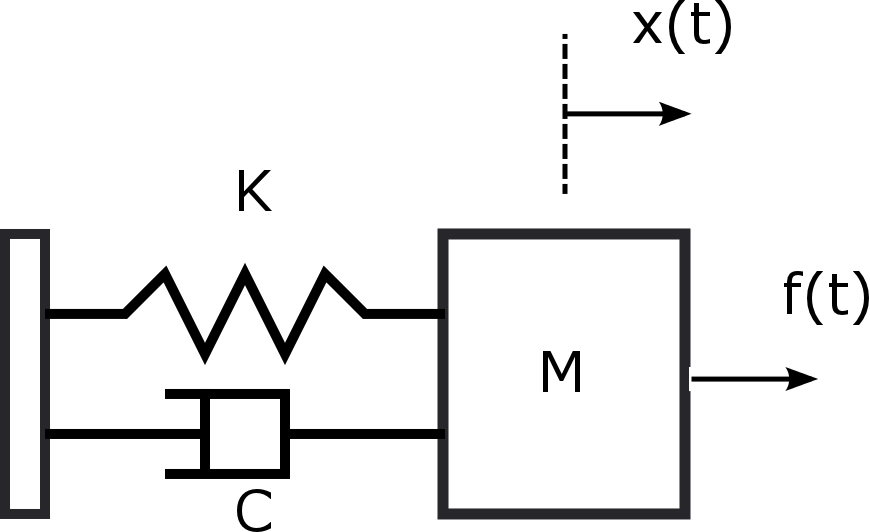

## Transfer function, characteristic equation, poles, partial fraction expansion etc

In [ ]:
omega_n, zeta, M, omega, s, t, F_0=symbols('omega_n, zeta, M, omega, s, t, F_0');
A=Matrix([[0,1],[-omega_n**2, -2*zeta*omega_n]])
Deltas=s**2+2*zeta*omega_n*s+omega_n**2;
Gs=(1/M)/Deltas

In [ ]:
poles=sym.solveset(Deltas, s)
polesList=[p for p in poles]

In [ ]:
p1=polesList[0]; p2=polesList[1];

In [ ]:
p1

omega_n*(-zeta + sqrt((zeta - 1)*(zeta + 1)))

### Partial Fraction Expansion

In [ ]:
expr1=(s*F_0/M)/(s+p2)
alpha1=simplify(expr1.subs(s,p1))

In [ ]:
expr2=(s*F_0/M)/(s+p1)
alpha2=simplify(expr2.subs(s,p2))

In [ ]:
simplify(alpha1*exp(p1*t)+alpha2*exp(p2*t))

F_0*((zeta - sqrt(zeta**2 - 1))*exp(omega_n*t*(zeta + sqrt((zeta - 1)*(zeta + 1)))) + (zeta + sqrt(zeta**2 - 1))*exp(omega_n*t*(zeta - sqrt((zeta - 1)*(zeta + 1)))))*exp(-2*omega_n*t*zeta)/(2*M*zeta)

In [ ]:
A.eigenvals()

{omega_n*(-zeta + sqrt((zeta - 1)*(zeta + 1))): 1,
 omega_n*(-zeta - sqrt((zeta - 1)*(zeta + 1))): 1}

In [ ]:
At=t*A
resp=simplify(At.exp()) @ Matrix([[x0],[dx0]])

In [ ]:
omega_d=omega_n*sqrt(1-zeta**2)

### Frequency Response

In [ ]:
M=1; wn=1; zeta=0.1; 
w=np.logspace(-1,1,1000);
chi_w=abs((1/M)/(np.sqrt((wn**2-w**2)**2+4*zeta**2*w**2*wn**2)))
phi_w=np.arctan(2*zeta*w*wn/(wn**2-w**2))

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=w, y=chi_w, mode='lines+markers', name='x'))
fig.update_layout(title='Amplitude Magnification', yaxis=dict(title=r'$\chi(\omega)$'), xaxis=dict(title=r'$\log{\omega}$', type='log'))
fig.show()

### Simulation of a Spring-Mass-Damper System

In [ ]:
def LinearSystemModel(X, t, A):
  dXdt=A @ X
  return dXdt
wn=1; zeta=0.1;
A=np.array([[0,1],[-wn**2,-2*zeta*wn]]);
[t,sol,fig]=md.simulateDySystem(LinearSystemModel, 40,0.01, [1,0], A, 'Spring Mass System', 'Time / t', 'x')

### Resonance Frequency and Resonance Amplitude

\begin{align}
\omega=\omega_r=\omega_n\sqrt{1-2\zeta^2},
\end{align}
and that the maximum amplitude of vibration is given by
\begin{align}
{x_{ss}}_{max}=\frac{F_0/M}{2\zeta\omega_n^2\sqrt{1-\zeta^2}}.
\end{align}

In [ ]:
K=1; M=2; zeta=0.3; F_0=1.8;
wn=sqrt(K/M); 
wr=wn*sqrt(1-2*zeta**2);
xssmax=(F_0/M)/(2*zeta*wn**2*sqrt(1-zeta**2))

In [ ]:
wr

0.640312423743285

In [ ]:
xssmax

0.979665283782408

# 2-DOF Translational Vibratory System EX#1

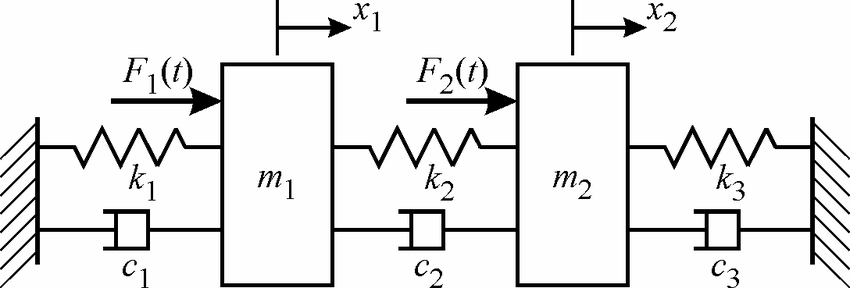

In [ ]:
m_1, m_2, m_3, k_1, k_2, k_3=symbols('m_1, m_2, m_3, k_1, k_2, k_3');
M=Matrix([[m_1,0],[0, m_2]]);
K=Matrix([[k_1+k_2,-k_2],[-k_2, k_2+k_3]])

In [ ]:
Omega=simplify(M.inv()@K)

In [ ]:
[*Omega.eigenvals()]

[(k_1*m_2 + k_2*m_1 + k_2*m_2 + k_3*m_1)/(2*m_1*m_2) - sqrt(k_1**2*m_2**2 - 2*k_1*k_2*m_1*m_2 + 2*k_1*k_2*m_2**2 - 2*k_1*k_3*m_1*m_2 + k_2**2*m_1**2 + 2*k_2**2*m_1*m_2 + k_2**2*m_2**2 + 2*k_2*k_3*m_1**2 - 2*k_2*k_3*m_1*m_2 + k_3**2*m_1**2)/(2*m_1*m_2),
 (k_1*m_2 + k_2*m_1 + k_2*m_2 + k_3*m_1)/(2*m_1*m_2) + sqrt(k_1**2*m_2**2 - 2*k_1*k_2*m_1*m_2 + 2*k_1*k_2*m_2**2 - 2*k_1*k_3*m_1*m_2 + k_2**2*m_1**2 + 2*k_2**2*m_1*m_2 + k_2**2*m_2**2 + 2*k_2*k_3*m_1**2 - 2*k_2*k_3*m_1*m_2 + k_3**2*m_1**2)/(2*m_1*m_2)]

# 2-DOF Translational Vibratory System EX#2

Consider the vibration of a coupled spring mass damper system that can be approximated by a system of the form: 

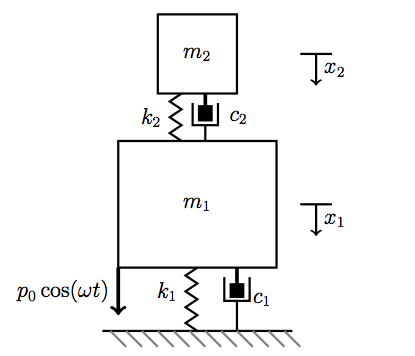



In [ ]:
m_1, m_2, m_3, k_1, k_2, k_3=symbols('m_1, m_2, m_3, k_1, k_2, k_3');
M=Matrix([[m_1,0],[0, m_2]]);
K=Matrix([[k_1+k_2,-k_2],[-k_2, k_2]])

In [ ]:
Omega=simplify(M.inv()@K)

In [ ]:
[*Omega.eigenvals()]

[(k_1*m_2 + k_2*m_1 + k_2*m_2)/(2*m_1*m_2) - sqrt(k_1**2*m_2**2 - 2*k_1*k_2*m_1*m_2 + 2*k_1*k_2*m_2**2 + k_2**2*m_1**2 + 2*k_2**2*m_1*m_2 + k_2**2*m_2**2)/(2*m_1*m_2),
 (k_1*m_2 + k_2*m_1 + k_2*m_2)/(2*m_1*m_2) + sqrt(k_1**2*m_2**2 - 2*k_1*k_2*m_1*m_2 + 2*k_1*k_2*m_2**2 + k_2**2*m_1**2 + 2*k_2**2*m_1*m_2 + k_2**2*m_2**2)/(2*m_1*m_2)]

# Question on Coupled Rotating and Translating System

In the event the following hold

1.   the motor mass and eccentricities are negligible compared to that of the blower
2.   the amplitude of motion is small

it is possible to approximate the behavior of this system by a lumped parameter system of the form shown in the figure below. Note that this is also similar to the vibration setup in the Applied Mechanics lab.

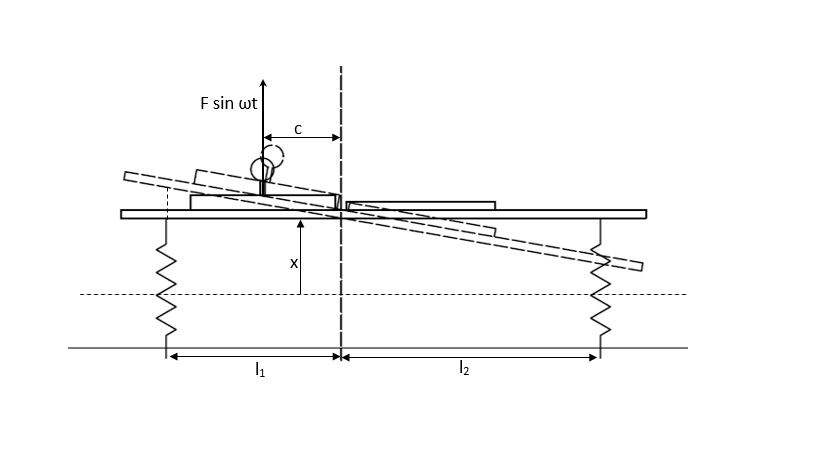 



In [ ]:
m, II, k, l=symbols('m, II, k, l');
M=Matrix([[m,0],[0, II]]);
K=Matrix([[2*k,-k*0.01*l],[-k*0.01*l, k*l**2*((0.99)**2+(1.01)**2)]])

In [ ]:
Omega=simplify(M.inv()@K)

In [ ]:
[*Omega.eigenvals()]

[1.0001*k*(0.999900009999*II + 1.0*l**2*m)/(II*m) - 1.41424891727022*k*sqrt(0.499975001249937*II**2 - II*l**2*m + 0.500075001249937*l**4*m**2)/(II*m),
 1.0001*k*(0.999900009999*II + 1.0*l**2*m)/(II*m) + 1.41424891727022*k*sqrt(0.499975001249937*II**2 - II*l**2*m + 0.500075001249937*l**4*m**2)/(II*m)]

# 3DOF Coupled Mechanical System Example

Consider the coupled spring mass system:

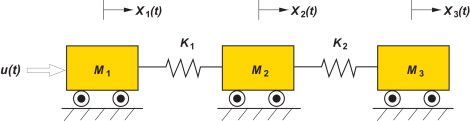

In [ ]:
m, m_1, m_2, m_3, k, k_1, k_2, k_3, omega, alpha, beta=symbols('m, m_1, m_2, m_3, k, k_1, k_2, k_3, omega, alpha, beta');
M=Matrix([[m_1,0,0],[0, m_2,0],[0,0,m_3]]);
K=Matrix([[k_1,-k_1,0],[-k_1,k_1+k_2,-k_2],[0,-k_2, k_2]])

In [ ]:
M

Matrix([
[m_1,   0,   0],
[  0, m_2,   0],
[  0,   0, m_3]])

In [ ]:
K

Matrix([
[ k_1,      -k_1,    0],
[-k_1, k_1 + k_2, -k_2],
[   0,      -k_2,  k_2]])

In [ ]:
Omega=simplify(M.inv()@K)

In [ ]:
Omega.eigenvals()

{(k_1*m_1*m_3 + k_1*m_2*m_3 + k_2*m_1*m_2 + k_2*m_1*m_3)/(2*m_1*m_2*m_3) + sqrt(k_1**2*m_1**2*m_3**2 + 2*k_1**2*m_1*m_2*m_3**2 + k_1**2*m_2**2*m_3**2 - 2*k_1*k_2*m_1**2*m_2*m_3 + 2*k_1*k_2*m_1**2*m_3**2 - 2*k_1*k_2*m_1*m_2**2*m_3 - 2*k_1*k_2*m_1*m_2*m_3**2 + k_2**2*m_1**2*m_2**2 + 2*k_2**2*m_1**2*m_2*m_3 + k_2**2*m_1**2*m_3**2)/(2*m_1*m_2*m_3): 1,
 (k_1*m_1*m_3 + k_1*m_2*m_3 + k_2*m_1*m_2 + k_2*m_1*m_3)/(2*m_1*m_2*m_3) - sqrt(k_1**2*m_1**2*m_3**2 + 2*k_1**2*m_1*m_2*m_3**2 + k_1**2*m_2**2*m_3**2 - 2*k_1*k_2*m_1**2*m_2*m_3 + 2*k_1*k_2*m_1**2*m_3**2 - 2*k_1*k_2*m_1*m_2**2*m_3 - 2*k_1*k_2*m_1*m_2*m_3**2 + k_2**2*m_1**2*m_2**2 + 2*k_2**2*m_1**2*m_2*m_3 + k_2**2*m_1**2*m_3**2)/(2*m_1*m_2*m_3): 1,
 0: 1}

In [ ]:
Delta=-omega**2*np.eye(3)+Omega

In [ ]:
print(det(Delta))

1.0*(-1.0*k_1*k_2*m_1*omega**2 - 1.0*k_1*k_2*m_2*omega**2 - 1.0*k_1*k_2*m_3*omega**2 + 1.0*k_1*m_1*m_3*omega**4 + 1.0*k_1*m_2*m_3*omega**4 + 1.0*k_2*m_1*m_2*omega**4 + 1.0*k_2*m_1*m_3*omega**4 - 1.0*m_1*m_2*m_3*omega**6)/(m_1*m_2*m_3)


In [ ]:
OmSq=(-k_1*k_2*m_1 - k_1*k_2*m_2 - k_1*k_2*m_3)/(m_1*m_2*m_3)

In [ ]:
Om4th=(k_1*m_1*m_3+ k_1*m_2*m_3+ k_2*m_1*m_2 + k_2*m_1*m_3)/(m_1*m_2*m_3)

In [ ]:
print(Delta)

Matrix([[k_1/m_1 - 1.0*omega**2, -k_1/m_1, 0], [-k_1/m_2, -1.0*omega**2 + (k_1 + k_2)/m_2, -k_2/m_2], [0, -k_2/m_3, k_2/m_3 - 1.0*omega**2]])


In [ ]:
AA=Matrix([[k_1/m_1 - 1.0*omega**2, -k_1/m_1, 1], [-k_1/m_2, -1.0*omega**2 + (k_1 + k_2)/m_2, 0], [0, -k_2/m_3, 0]])

In [ ]:
AA

⎡k₁    2       -k₁         ⎤
⎢── - ω        ────       1⎥
⎢m₁             m₁         ⎥
⎢                          ⎥
⎢ -k₁        2   k₁ + k₂   ⎥
⎢ ────    - ω  + ───────  0⎥
⎢  m₂               m₂     ⎥
⎢                          ⎥
⎢              -k₂         ⎥
⎢   0          ────       0⎥
⎣               m₃         ⎦

In [ ]:
print(det(AA))

k_1*k_2/(m_2*m_3)


In [ ]:
m_1=1.; m_2=1.2; m_3=1.3; k_1=1.4; k_2=1.1;
M=np.array([[m_1,0,0],[0, m_2,0],[0,0,m_3]]);
K=np.array([[k_1,-k_1,0],[-k_1,k_1+k_2,-k_2],[0,-k_2, k_2]])

In [ ]:
Omega=np.linalg.inv(M)@K

In [ ]:
np.linalg.eig(Omega)

(array([ 3.27424195e+00,  1.05524523e+00, -2.19958365e-16]),
 array([[ 0.57640101,  0.69779476,  0.57735027],
        [-0.77165354,  0.17183433,  0.57735027],
        [ 0.26891018, -0.69538151,  0.57735027]]))

In [ ]:
Delta=-omega**2*np.eye(3)+Omega

In [ ]:
Delta

array([[1.4 - 1.0*omega**2, -1.40000000000000, 0],
       [-1.16666666666667, 2.08333333333333 - 1.0*omega**2,
        -0.916666666666667],
       [0, -0.846153846153846, 0.846153846153846 - 1.0*omega**2]],
      dtype=object)

In [ ]:
DeltaM=Matrix([[1.4 - 1.0*omega**2, -1.40000000000000, 0],
       [-1.16666666666667, 2.08333333333333 - 1.0*omega**2,
        -0.916666666666667],
       [0, -0.846153846153846, 0.846153846153846 - 1.0*omega**2]])

In [ ]:
det(DeltaM)

-1.0*omega**6 + 4.32948717948718*omega**4 - 3.45512820512819*omega**2 - 8.43769498715119e-15

In [ ]:
AA=Matrix([[k_1/m_1 - 1.0*omega**2, -k_1/m_1, 1], [-k_1/m_2, -1.0*omega**2 + (k_1 + k_2)/m_2, 0], [0, -k_2/m_3, 0]])

In [ ]:
print(det(AA))

0.987179487179487


# Mechanics stuff

In [ ]:
y, theta, phi = dynamicsymbols('y, theta, phi')
ld, m, k, g, t, N_1, N_3, T_1, T_2, T_3, M, II_1, II_2, II_3= symbols('ld, m, k, g, t, N_1, N_3, T_1, T_2, T_3, M, II_1, II_2, II_3')
init_vprinting()
R1_phi = Matrix([[1, 0, 0],[0, cos(phi), -sin(phi)],[0, sin(phi),cos(phi)]])
R3_theta = Matrix([[cos(theta),-sin(theta),0],[sin(theta),cos(theta),0],[0,0,1]])

In [ ]:
dy=y.diff('t');
ddy=dy.diff('t');
dtheta = theta.diff(t);
ddtheta=dtheta.diff('t');
dphi = phi.diff(t)
ddphi = dphi.diff(t)

In [ ]:
m, d=symbols('m, d')

In [ ]:
II=Matrix([[II_1,0,0],[0,II_2,0],[0,0,II_3]]);
R=R3_theta@R1_phi;
Omega_3=Matrix([0,0,dtheta]);
Omega_1=Matrix([dphi,0,0]);
Omega=Omega_1+R1_phi.T@Omega_3;
hatOmega_3=Matrix([[0, -Omega_3[2], Omega_3[1]],[Omega_3[2],0,-Omega_3[0]],[-Omega_3[1],Omega_3[0],0]])
hatOmega_1=Matrix([[0, -Omega_1[2], Omega_1[1]],[Omega_1[2],0,-Omega_1[0]],[-Omega_1[1],Omega_1[0],0]])
hatOmega=Matrix([[0, -Omega[2], Omega[1]],[Omega[2],0,-Omega[0]],[-Omega[1],Omega[0],0]])
dOmega_3=Matrix([0,0,ddtheta]);
dOmega_1=Matrix([ddphi,0,0]);
dOmega=dOmega_1+R1_phi.T@dOmega_3-hatOmega_1@R1_phi.T@Omega_3;
hatdOmega_3=Matrix([[0, -dOmega_3[2], dOmega_3[1]],[dOmega_3[2],0,-dOmega_3[0]],[-dOmega_3[1],dOmega_3[0],0]])
hatdOmega_1=Matrix([[0, -dOmega_1[2], dOmega_1[1]],[dOmega_1[2],0,-dOmega_1[0]],[-dOmega_1[1],dOmega_1[0],0]])
hatdOmega=Matrix([[0, -dOmega[2], dOmega[1]],[dOmega[2],0,-dOmega[0]],[-dOmega[1],dOmega[0],0]])
barX_p=Matrix([0,y,d]);
dbarX_p=Matrix([0,dy,0]);
ddbarX_p=Matrix([0,ddy,0]);
hatbarX_p=Matrix([[0, -barX_p[2], barX_p[1]],[barX_p[2],0,-barX_p[0]],[-barX_p[1],barX_p[0],0]]);
hatdbarX_p=Matrix([[0, -dbarX_p[2], dbarX_p[1]],[dbarX_p[2],0,-dbarX_p[0]],[-dbarX_p[1],dbarX_p[0],0]]);
hatddbarX_p=Matrix([[0, -ddbarX_p[2], ddbarX_p[1]],[ddbarX_p[2],0,-ddbarX_p[0]],[-ddbarX_p[1],ddbarX_p[0],0]]);
f_pg=Matrix([0,0,-m*g]);
F_p=Matrix([N_1,-k*y,N_3])+R1_phi.T@ f_pg;

In [ ]:
R

⎡cos(θ)  -sin(θ)⋅cos(φ)  sin(φ)⋅sin(θ) ⎤
⎢                                      ⎥
⎢sin(θ)  cos(φ)⋅cos(θ)   -sin(φ)⋅cos(θ)⎥
⎢                                      ⎥
⎣  0         sin(φ)          cos(φ)    ⎦

In [ ]:
Omega

⎡   φ̇    ⎤
⎢        ⎥
⎢sin(φ)⋅θ̇⎥
⎢        ⎥
⎣cos(φ)⋅θ̇⎦

In [ ]:
simplify(R@(-m*hatbarX_p@hatbarX_p @ Omega))[2]

In [ ]:
init_vprinting()

In [ ]:
simplify(R@(-m*hatbarX_p@hatbarX_p @ Omega))[2]

In [ ]:
m*R@(dbarX_p+hatOmega@barX_p)

⎡-m⋅(-d⋅φ̇ + ẏ)⋅sin(θ)⋅cos(φ) + m⋅(d⋅sin(φ)⋅θ̇ - y⋅cos(φ)⋅θ̇)⋅cos(θ) + m⋅y⋅si
⎢                                                                             
⎢m⋅(-d⋅φ̇ + ẏ)⋅cos(φ)⋅cos(θ) + m⋅(d⋅sin(φ)⋅θ̇ - y⋅cos(φ)⋅θ̇)⋅sin(θ) - m⋅y⋅sin
⎢                                                                             
⎣                          m⋅(-d⋅φ̇ + ẏ)⋅sin(φ) + m⋅y⋅cos(φ)⋅φ̇              

n(φ)⋅sin(θ)⋅φ̇⎤
         ⎥
(φ)⋅cos(θ)⋅φ̇ ⎥
         ⎥
            ⎦

In [ ]:
simplify(R@(hatbarX_p@(dbarX_p+hatOmega@barX_p)))

⎡                                          ⎛               2  ⎞               
⎢d⋅(d⋅sin(φ) - y⋅cos(φ))⋅sin(θ)⋅cos(φ)⋅θ̇ - ⎝d⋅(d⋅φ̇ - ẏ) + y ⋅φ̇⎠⋅cos(θ) + (
⎢                                                                             
⎢                                           ⎛               2  ⎞              
⎢-d⋅(d⋅sin(φ) - y⋅cos(φ))⋅cos(φ)⋅cos(θ)⋅θ̇ - ⎝d⋅(d⋅φ̇ - ẏ) + y ⋅φ̇⎠⋅sin(θ) - 
⎢                                                                             
⎢                                                                 2           
⎣                                           -(d⋅sin(φ) - y⋅cos(φ)) ⋅θ̇        

                                   ⎤
d⋅sin(φ) - y⋅cos(φ))⋅y⋅sin(φ)⋅sin(θ)⋅θ̇ ⎥
                                   ⎥
                                   ⎥
(d⋅sin(φ) - y⋅cos(φ))⋅y⋅sin(φ)⋅cos(θ)⋅θ̇⎥
                                   ⎥
                                   ⎥
                                    ⎦

# Manual Grading

By considering $x_1 = x$ and $x_2=\dot{x}$ \begin{align*} \begin{bmatrix} \dot{x}_1 \\ \dot{x}_2 \end{bmatrix} &= \begin{bmatrix} 0 & 1 \\ -\frac{C}{M} & \frac{K}{M} \end{bmatrix}\begin{bmatrix} {x}_1 \\ _2 \end{bmatrix} + \begin{bmatrix} 0 & 0 \\ 0 & \frac{1}{M} \end{bmatrix}\begin{bmatrix} 0 \\ F \end{bmatrix} \\ \dot{X} &= AX + Bu \end{align*} \\ The general solution of the equation can be obtained by getting the lapcae of, \begin{align*} \mathcal{L}(\dot{X})&=\mathcal{L}(AX) + \mathcal{L}(Bu) \\ s\mathcal{L}({X}) - X(0) &= A\mathcal{L}({X}) + \mathcal{L}(Bu(s)) \\ \mathcal{L}({X}) &= \frac{X(0)}{s+A} + \mathcal{L}(\frac{Bu}{s}) \end{align*} \\ Then we obtain the inverse laplace transform, \begin{align*} \mathcal{L}^{-1}({X}) = \mathcal{L}^{-1}(\frac{1}{s+A})X(0) + \mathcal{L}^{-1}(\frac{Bu(s)}{s}) \\ X(t) = e^{At}X(0) + \int^t_0{e^{A(t-\tau)}Bu(\tau)d\tau} \end{align*} )